In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
#font = {'size'   : 12}
#plt.rc('font', **font)

## Import dataset
dataset is originally prepared as text file, so following process is needed to convert txt file to csv file. The process includes collapsing blanks.

In [3]:
def collapseBlanks(original_path, saving_path):
    
    with open(original_path, 'r') as file :
         lines = file.readlines()
    
    for i, line in enumerate(lines):
        collapsed = ' '.join(line.split())
        lines[i] = lines[i].replace(line, collapsed)
        
    with open(saving_path, 'w') as file :
        for i in range(len(lines)-1):
            file.write(lines[i+1]+'\n')

In [4]:
collapseBlanks("./Anno/original/list_attr_img.txt", "./Anno/changed/list_attr_img.txt")
collapseBlanks("./Anno/original/list_attr_cloth.txt", "./Anno/changed/list_attr_cloth.txt")

with open("./Anno/changed/list_attr_cloth.txt", 'r') as file :
    filedata = file.read()
filedata = filedata.replace('attribute_type', ',attribute_type')
for attribute_type in range(1,6):
    filedata = filedata.replace(str(attribute_type), ','+str(attribute_type))

with open("./Anno/changed/list_attr_cloth.txt", 'w') as file :
    file.write(filedata)

In [5]:
collapseBlanks("./Anno/original/list_category_cloth.txt", "./Anno/changed/list_category_cloth.txt")
collapseBlanks("./Anno/original/list_category_img.txt", "./Anno/changed/list_category_img.txt")

# make dataframes and csv files

### 4 dataframes according to the given text files

In [6]:
df_attr_img = pd.read_csv('./Anno/changed/list_attr_img.txt', header = None, skiprows=1, sep = ' ')
df_attr_cloth = pd.read_csv('./Anno/changed/list_attr_cloth.txt', sep = ',') 
df_category_cloth = pd.read_csv('./Anno/changed/list_category_cloth.txt', sep = ' ')
df_category_img = pd.read_csv('./Anno/changed/list_category_img.txt',sep = ' ') #, index_col='image_name'

In [7]:
#inserting category_label to category_cloth
df_category_cloth.insert(0, 'category_label', range(1, len(df_category_cloth)+1))

In [8]:
df_category_cloth.head()

,category_label,category_name,category_type
0,1,Anorak,1
1,2,Blazer,1
2,3,Blouse,1
3,4,Bomber,1
4,5,Button-Down,1


In [9]:
df_category_img.head()

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3


In [10]:
df_attr_cloth.head()

,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1


In [11]:
df_attr_img.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [12]:
df_attr_img.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289222 entries, 0 to 289221
Data columns (total 1001 columns):
0       object
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24      int64
25      int64
26      int64
27      int64
28      int64
29      int64
30      int64
31      int64
32      int64
33      int64
34      int64
35      int64
36      int64
37      int64
38      int64
39      int64
40      int64
41      int64
42      int64
43      int64
44      int64
45      int64
46      int64
47      int64
48      int64
49      int64
50      int64
51      int64
52      int64
53      int64
54      int64
55      int64
56      int64
57      int64
58      int64
59      int64
60      int64
61      int64
62      int64
63  

In [13]:
df_attr_cloth.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
attribute_name     1000 non-null object
attribute_type     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [14]:
df_category_cloth.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
category_label    50 non-null int32
category_name     50 non-null object
category_type     50 non-null int64
dtypes: int32(1), int64(1), object(1)
memory usage: 1.1+ KB


In [15]:
df_category_img.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289222 entries, 0 to 289221
Data columns (total 2 columns):
image_name        289222 non-null object
category_label    289222 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


### combining dataframes
+ Combining image and category name

In [16]:
df_category_combined = pd.merge(df_category_cloth, df_category_img)

In [17]:
df_category_combined.head()

,category_label,category_name,category_type,image_name
0,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000001.jpg
1,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000002.jpg
2,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000003.jpg
3,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000004.jpg
4,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000005.jpg


+ Combining image and attribute name

In [18]:
lst_attr = df_attr_cloth['attribute_name ']
df_attr_img.columns = pd.Series(['image_name']).append(lst_attr,ignore_index=True)
df_attr_combined= df_attr_img

In [19]:
df_attr_combined.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


+ Combining attributes and category

In [20]:
df_attr_category_combined = pd.merge(df_attr_combined, df_category_combined)

In [25]:
df_attr_category_combined.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered,category_label,category_name,category_type
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1


+ export attr_combined.csv, category_combined.csv, attr_category_combined.csv

In [26]:
#attr_combined.csv
file_name = "attr_combined.csv"
df_attr_combined.to_csv("./Anno/changed/"+file_name, index=None)

In [ ]:
#category_combined.csv
file_name = "category_combined.csv"
df_category_combined.to_csv("./Anno/changed/"+file_name, index=None)

In [ ]:
#attr_category_combined.csv
file_name = "attr_category_combined.csv"
df_attr_category_combined.to_csv("./Anno/changed/"+file_name, index=None)

## Visualize

### attribute distribution(frequency)

In [27]:
attr_frequency = (df_attr_combined.iloc[:,1:] == 1).sum(axis=0)
attr_frequency_sort=attr_frequency.sort_values(ascending = False)

In [131]:
attr_frequency_sort.head(30)

print            37367
floral           24188
lace             20434
knit             18498
sleeve           17828
maxi             15990
shirt            14920
denim            13178
striped          11771
chiffon          11735
crochet           8987
stripe            8591
sleeveless        7987
summer            7616
floral print      7560
fit               7489
cotton            7370
leather           7334
faux              7243
classic           7184
graphic           6933
pleated           6755
red               6717
long sleeve       6656
embroidered       6621
pink              6569
printed           6568
bodycon           6419
crop              6221
skater            6205
dtype: int64

### plot attribute count in descending order
plot whole attributes to analyze distribution

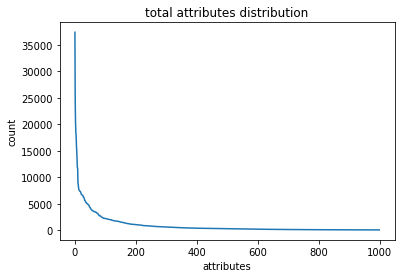

In [111]:
plt.plot([x for x in range(len(attr_frequency_sort))], [val for val in attr_frequency_sort])
plt.title("total attributes distribution")
plt.xlabel("attributes")
plt.ylabel("count")
plt.savefig('result/total_attr_distr.png')

plot top 50 number of attributes to analyze distribution

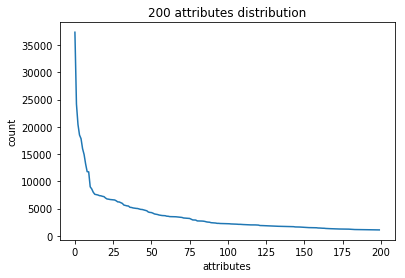

In [112]:
plt.plot([x for x in range(200)], [val for val in attr_frequency_sort[:200]])
plt.title("200 attributes distribution")
plt.xlabel("attributes")
plt.ylabel("count")
plt.savefig('result/200_attr_distr.png')

plot top 50 attributes to analyze distribution

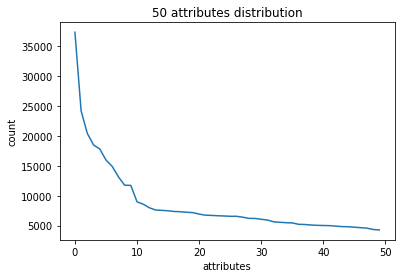

In [113]:
plt.plot([x for x in range(50)], [val for val in attr_frequency_sort[:50]])
plt.title("50 attributes distribution")
plt.xlabel("attributes")
plt.ylabel("count")
plt.savefig('result/50_attr_distr.png')

plot top 20 attributes to analyze distribution

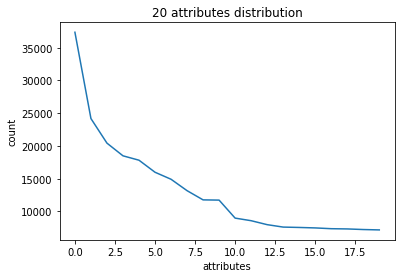

In [114]:
plt.plot([x for x in range(20)], [val for val in attr_frequency_sort[:20]])
plt.title("20 attributes distribution")
plt.xlabel("attributes")
plt.ylabel("count")
plt.savefig('result/20_attr_distr.png')

plot histogram of top 20 attributes to analyze distribution

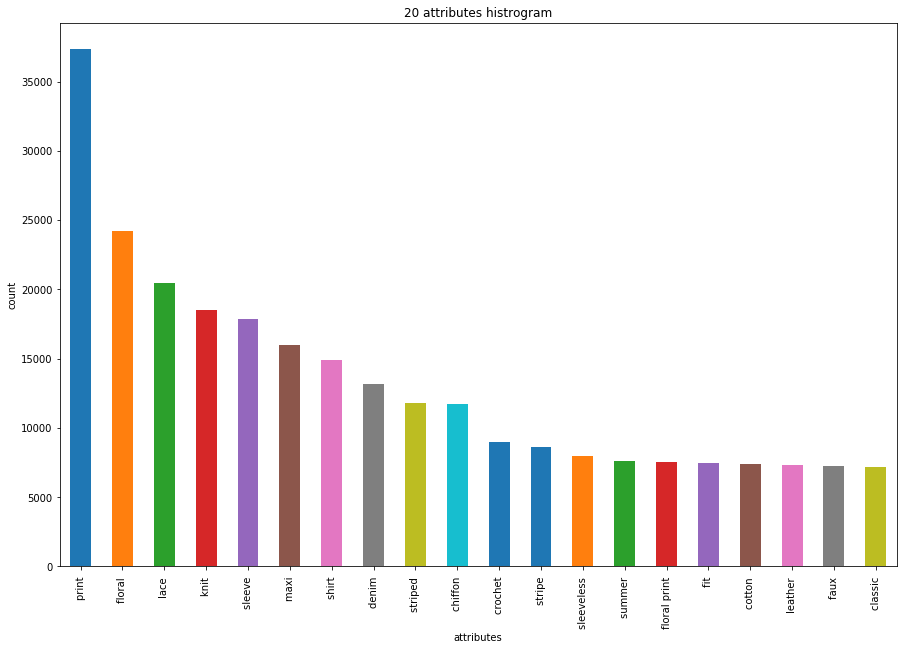

In [115]:
attr_frequency_sort[:20].plot(kind = 'bar', figsize=(15,10), fontsize = 10)
plt.title("20 attributes histrogram")
plt.xlabel("attributes")
plt.ylabel("count")
plt.savefig('result/20_attr_hist.png')

### category distribution(frequency)

In [34]:
category_frequency= df_category_combined.groupby(['category_name'])['image_name'].count()
category_frequency_sort = category_frequency.sort_values(ascending=False)

In [35]:
category_frequency_sort

category_name
Dress          72158
Tee            36887
Blouse         24557
Shorts         19666
Tank           15429
Skirt          14773
Cardigan       13311
Sweater        13123
Jacket         10467
Top            10078
Blazer          7495
Romper          7408
Jeans           7076
Jumpsuit        6153
Leggings        5013
Joggers         4416
Hoodie          4048
Sweatpants      3048
Kimono          2294
Coat            2120
Cutoffs         1669
Sweatshorts     1106
Poncho           791
Jersey           748
Henley           716
Parka            676
Jeggings         594
Chinos           527
Culottes         486
Trunks           386
Button-Down      330
Flannel          324
Bomber           309
Anorak           160
Robe             150
Turtleneck       146
Kaftan           126
Peacoat           97
Capris            77
Onesie            70
Caftan            54
Gauchos           49
Jodhpurs          45
Sarong            32
Coverup           17
Halter            17
Name: image_name, dt

### plot category count in descending order
plot whole categories to analyze distribution

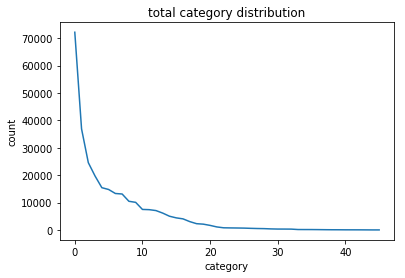

In [116]:
plt.plot([x for x in range(len(category_frequency_sort))], [val for val in category_frequency_sort])
plt.title("total category distribution")
plt.xlabel("category")
plt.ylabel("count")
plt.savefig('result/total_category_distr.png')

plot top 20 categories to analyze distribution

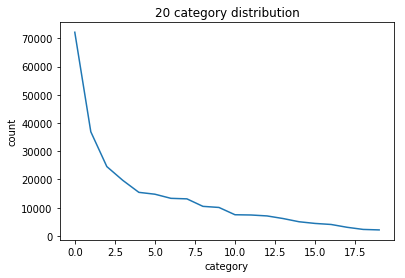

In [117]:
plt.plot([x for x in range(20)], [val for val in category_frequency_sort[:20]])
plt.title("20 category distribution")
plt.xlabel("category")
plt.ylabel("count")
plt.savefig('result/20_category_distr.png')

plot top 10 categories to analyze distribution

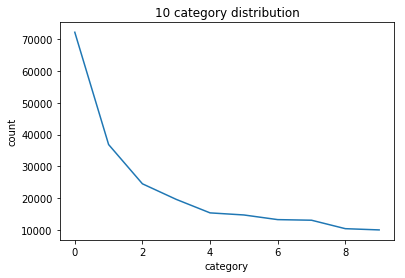

In [118]:
plt.plot([x for x in range(10)], [val for val in category_frequency_sort[:10]])
plt.title("10 category distribution")
plt.xlabel("category")
plt.ylabel("count")
plt.savefig('result/10_category_distr.png')

plot histogram of top 20 categories to analyze distribution

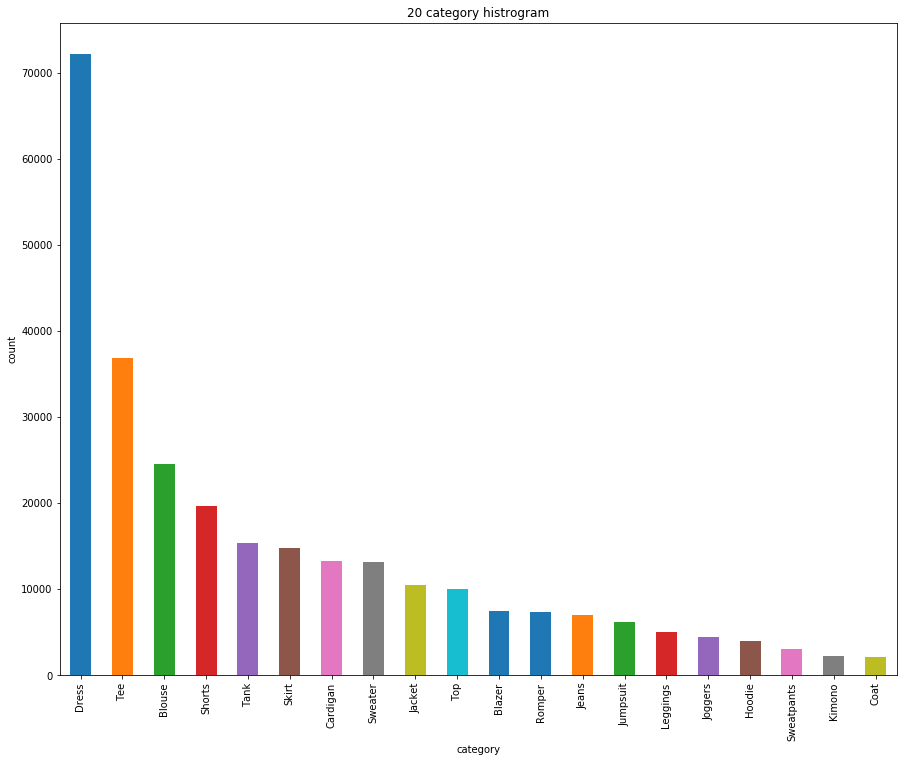

In [119]:
category_frequency_sort[:20].plot(kind = 'bar', figsize=(15,12), fontsize = 10)
plt.title("20 category histrogram")
plt.xlabel("category")
plt.ylabel("count")
plt.savefig('result/20_category_hist.png')

## groupby attribute types

In [40]:
df_attr_cloth.groupby(df_attr_cloth.attribute_type).size()

attribute_type
1    156
2    218
3    180
4    216
5    230
dtype: int64

In [41]:
def df_attr_type(attr_type, i):

    df_attr_type = ('df_attr_'+attr_type)
    lst_attr_type = ('lst_attr_'+attr_type)
    attr_type_frequency = (attr_type+'_frequency')
    attr_type_frequency_sort = (attr_type+'_frequency_sort')
        
    df_attr_type = df_attr_cloth[(df_attr_cloth.attribute_type == i)]
        
    lst_attr_type = ['image_name']+ (df_attr_type['attribute_name '].values.tolist())
    df_attr_type = pd.DataFrame(df_attr_img, columns=lst_attr_type)
    attr_type_frequency = (df_attr_type.iloc[:,1:] == 1).sum(axis=0)
    attr_type_frequency_sort = attr_type_frequency.sort_values(ascending = False)
    
    return df_attr_type, lst_attr_type, attr_type_frequency, attr_type_frequency_sort

In [42]:
df_attr_texture, lst_attr_texture, attr_texture_frequency, attr_texture_frequency_sort = df_attr_type('texture', 1)
df_attr_fabric, lst_attr_fabric, attr_fabric_frequency, attr_fabric_frequency_sort = df_attr_type('fabric', 2)
df_attr_shape, lst_attr_shape, attr_shape_frequency, attr_shape_frequency_sort = df_attr_type('shape', 3)
df_attr_part, lst_attr_part, attr_part_frequency, attr_part_frequency_sort = df_attr_type('part', 4)
df_attr_style, lst_attr_style, attr_style_frequency, attr_style_frequency_sort = df_attr_type('style', 5)

### make csv file for each type

In [ ]:
df_attr_texture.to_csv("./Anno/changed/attr_texture.csv", index=None)
df_attr_fabric.to_csv("./Anno/changed/attr_fabric.csv", index=None)
df_attr_shape.to_csv("./Anno/changed/attr_shape.csv", index=None)
df_attr_part.to_csv("./Anno/changed/attr_part.csv", index=None)
df_attr_style.to_csv("./Anno/changed/attr_style.csv", index=None)

#### texture

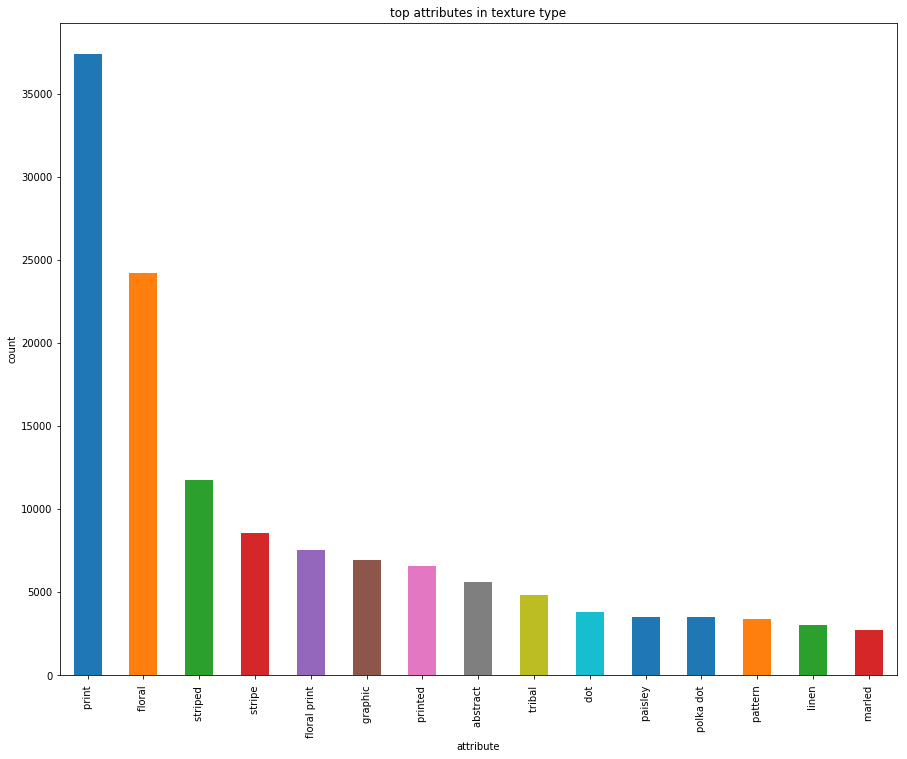

In [120]:
attr_texture_frequency_sort[:15].plot(kind = 'bar', figsize=(15,12), fontsize = 10)
plt.title("top attributes in texture type")
plt.xlabel("attribute")
plt.ylabel("count")
plt.savefig('result/texture_attr.png')

#### fabric

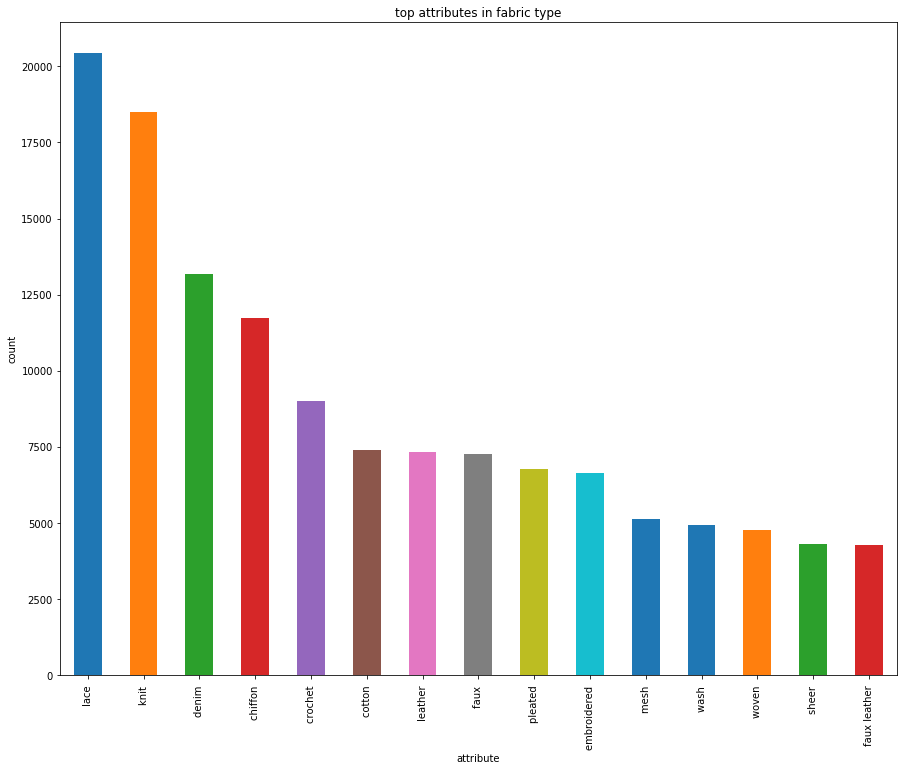

In [121]:
attr_fabric_frequency_sort[:15].plot(kind = 'bar',figsize=(15,12), fontsize = 10)
plt.title("top attributes in fabric type")
plt.xlabel("attribute")
plt.ylabel("count")
plt.savefig('result/fabric_attr.png')

#### shape

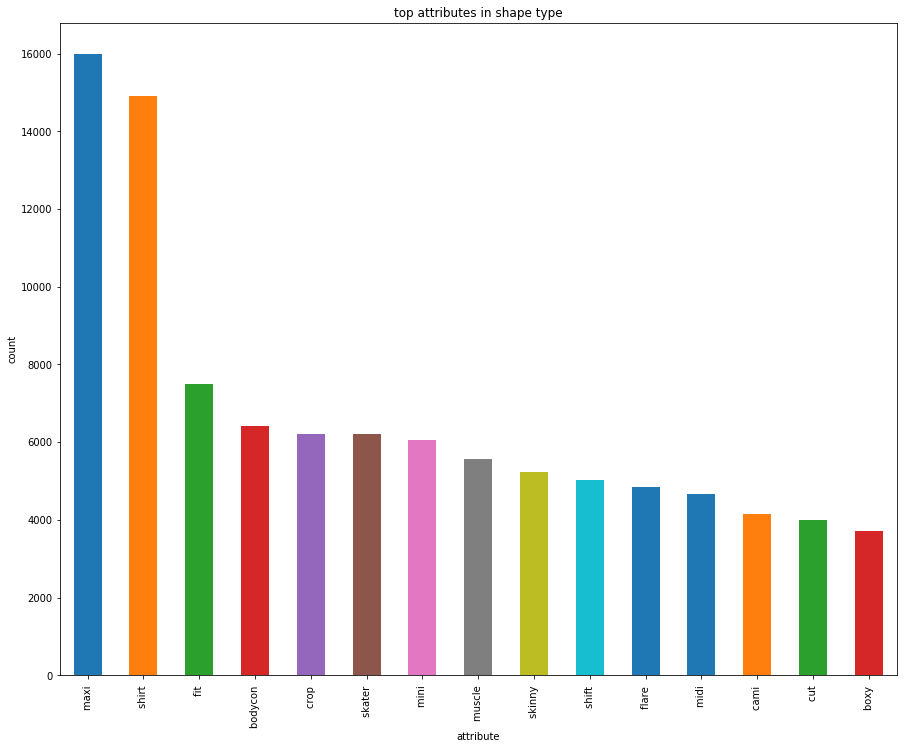

In [122]:
attr_shape_frequency_sort[:15].plot(kind = 'bar', figsize=(15,12), fontsize = 10)
plt.title("top attributes in shape type")
plt.xlabel("attribute")
plt.ylabel("count")
plt.savefig('result/shape_attr.png')

#### part

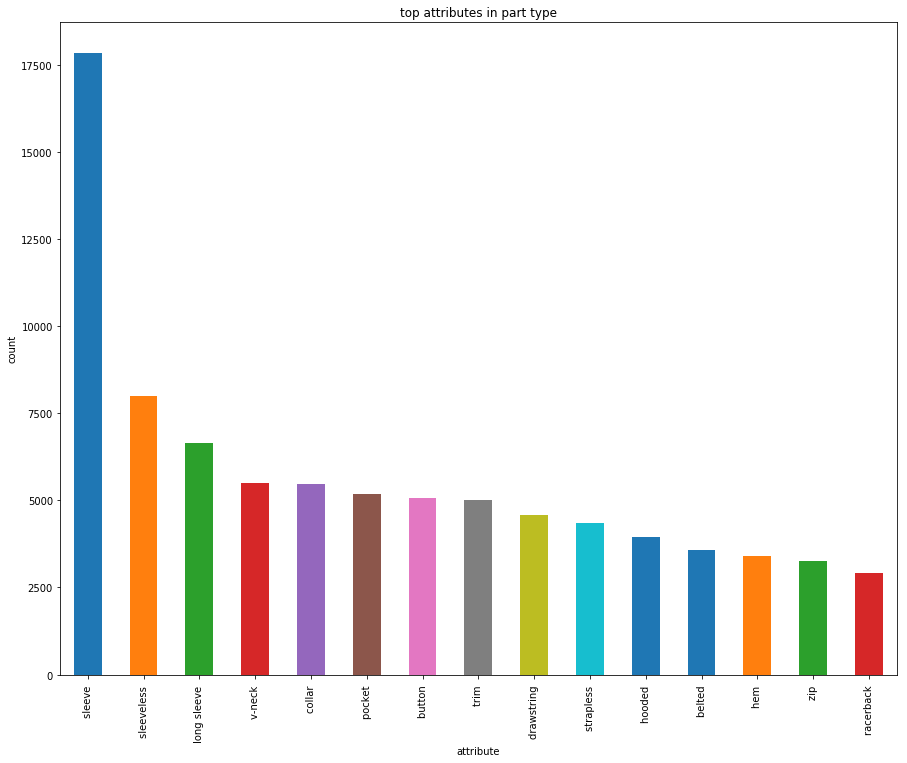

In [123]:
attr_part_frequency_sort[:15].plot(kind = 'bar', figsize=(15,12), fontsize = 10)
plt.title("top attributes in part type")
plt.xlabel("attribute")
plt.ylabel("count")
plt.savefig('result/part_attr.png')

#### style

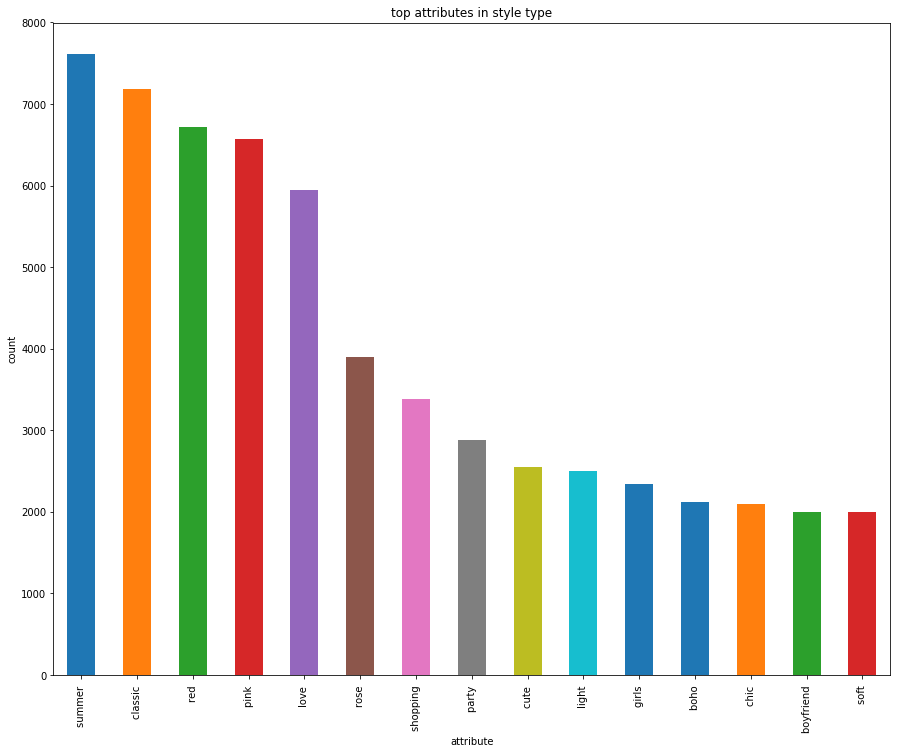

In [125]:
attr_style_frequency_sort[:15].plot(kind = 'bar', figsize=(15,12), fontsize = 10)
plt.title("top attributes in style type")
plt.xlabel("attribute")
plt.ylabel("count")
plt.savefig('result/style_attr.png')

## Frequency of Attributes in top Category

In [48]:
lst_category_frequency_top5 = list(category_frequency_sort[:5].index)

In [49]:
lst_category_frequency_top5

['Dress', 'Tee', 'Blouse', 'Shorts', 'Tank']

In [50]:
groupby_category = df_attr_category_combined.groupby('category_name')

In [51]:
def attributes_for_category(dict_group, df_group):

    for attr in lst_attr:
        dict_group[attr] = np.sum(df_group[attr].values == 1)

    return dict_group, df_group

In [52]:
def create_groupName_for_df_dict(df_groupName, dict_groupName, groupName):
    df_groupName = groupby_category.get_group(groupName)
    dict_groupName = {}
    return attributes_for_category(dict_groupName, df_groupName)

In [53]:
dict_dress, df_dress = create_groupName_for_df_dict('df_dress', 'dict_dress', 'Dress')

In [54]:
dict_tee, df_tee = create_groupName_for_df_dict('df_tee', 'dict_tee', 'Tee')

In [55]:
dict_blouse, df_blouse = create_groupName_for_df_dict('df_blouse', 'dict_blouse', 'Blouse')

In [56]:
dict_shorts, df_shorts = create_groupName_for_df_dict('df_shorts', 'dict_shorts', 'Shorts')

In [57]:
dict_tank, df_tank = create_groupName_for_df_dict('df_tank', 'dict_tank', 'Tank')

In [58]:
def plot_dict(dict_attr):
    sorted_by_value = {k: v for k, v in sorted(dict_attr.items(), key=lambda kv: kv[1], reverse= True)}
    sorted_by_value_part = {k: sorted_by_value[k] for k in list(sorted_by_value)[:15]}
    plt.figure(figsize=(15,5))
    plt.bar(sorted_by_value_part.keys(), sorted_by_value_part.values())

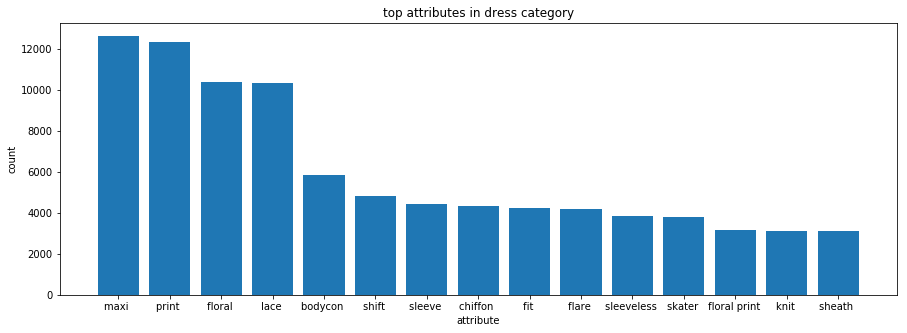

In [126]:
plot_dict(dict_dress)
plt.title("top attributes in dress category")
plt.xlabel("attribute")
plt.ylabel("count")
plt.savefig('result/dress_attr.png')

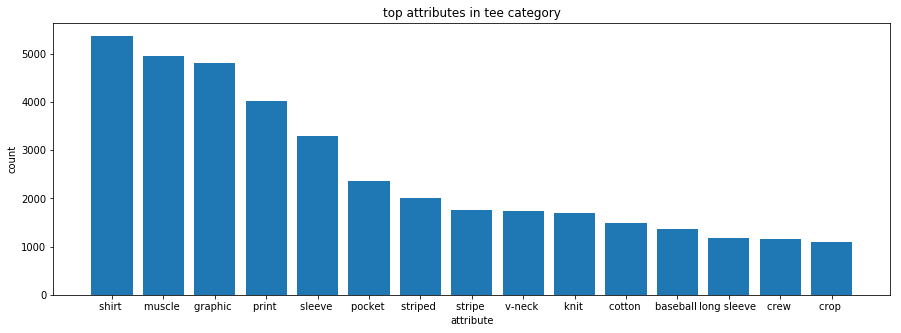

In [127]:
plot_dict(dict_tee)
plt.title("top attributes in tee category")
plt.xlabel("attribute")
plt.ylabel("count")
plt.savefig('result/tee_attr.png')

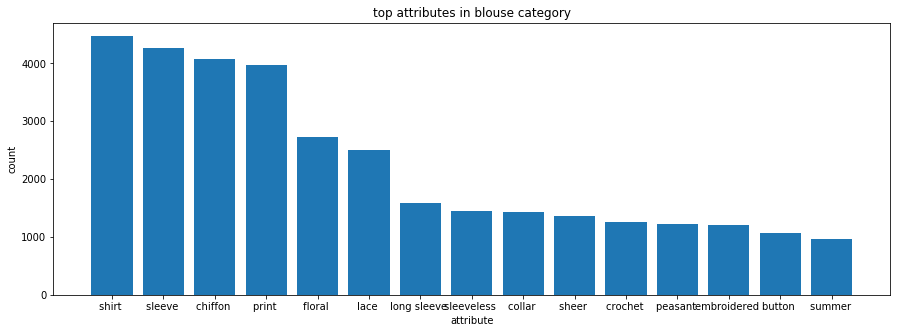

In [128]:
plot_dict(dict_blouse)
plt.title("top attributes in blouse category")
plt.xlabel("attribute")
plt.ylabel("count")
plt.savefig('result/blouse_attr.png')

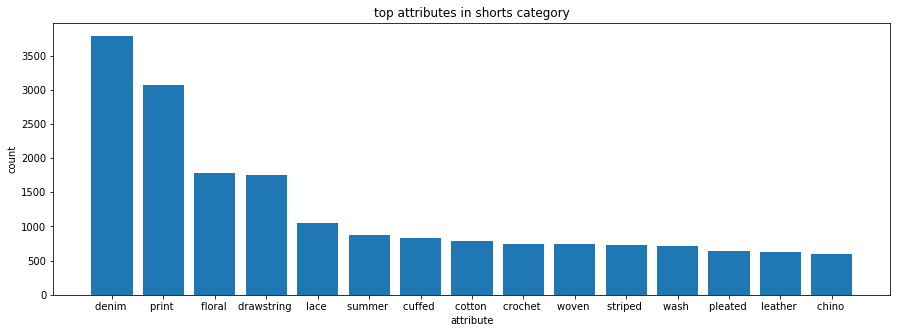

In [129]:
plot_dict(dict_shorts)
plt.title("top attributes in shorts category")
plt.xlabel("attribute")
plt.ylabel("count")
plt.savefig('result/shorts_attr.png')

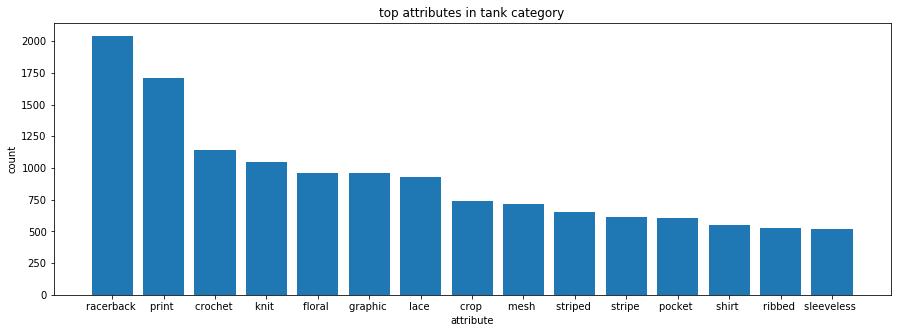

In [130]:
plot_dict(dict_tank)
plt.title("top attributes in tank category")
plt.xlabel("attribute")
plt.ylabel("count")
plt.savefig('result/tank_attr.png')